## Test Riksdagen SFS dokument 

* Denna [Jupyter Notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksdagens%20dokument%20SFS.ipynb)  
 * [KU anmälningar](https://github.com/salgo60/open-data-examples/blob/master/Riksdagens%20dokument%20KU-anm%C3%A4lningar.ipynb) 
 * [Motioner](https://github.com/salgo60/open-data-examples/blob/master/Riksdagens%20dokument%20Motioner.ipynb)
 * [Ledamöter](https://github.com/salgo60/open-data-examples/blob/master/Riksdagens%20ledam%C3%B6ter.ipynb)
 * [Dokumenttyper](https://github.com/salgo60/open-data-examples/blob/master/Riksdagens%20dokumenttyper.ipynb)
* [Skapa sökfråga](http://data.riksdagen.se/dokumentlista/)   

* 13980 hämtade verkar som diff med [Dokument & lagar (10 504 träffar)](https://www.riksdagen.se/sv/dokument-lagar/?doktyp=sfs) 

### Test SFS nr 2020-577
* [Fulltext](https://www.riksdagen.se/sv/dokument-lagar/dokument/svensk-forfattningssamling/forordning-2020577-om-statligt-stod-for_sfs-2020-577) [text](http://data.riksdagen.se/dokument/sfs-2020-577.text) / [html](http://data.riksdagen.se/dokument/sfs-2020-577.html) /  [json](http://data.riksdagen.se/dokument/sfs-2020-577.json) 


In [1]:
from datetime import datetime
now = datetime.now()
print("Last run: ", datetime.now())

Last run:  2020-09-12 14:23:28.622684


In [2]:
import urllib3, json
import pandas as pd 
from tqdm.notebook import trange  
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
urlbase ="http://data.riksdagen.se/dokumentlista/?sok=&doktyp=SFS&utformat=json&start="

dftot = pd.DataFrame()
for i in trange(1,700): # looks we today have 10504 SFS --> 10503/20
    url = urlbase + str(i)
    r = http.request('GET', url)
    data = json.loads(r.data)
    r = http.request('GET', url)
    dftot = dftot.append(pd.DataFrame(data["dokumentlista"]["dokument"]),sort=False)
dftot.head()


,traff,domain,database,datum,id,rdrest,slutdatum,rddata,plats,klockslag,publicerad,systemdatum,undertitel,kalla,kall_id,dok_id,dokumentformat,dokument_url_text,dokument_url_html,inlamnad,motionstid,tilldelat,lang,url,relurl,titel,rm,organ,relaterat_id,doktyp,typ,subtyp,beteckning,tempbeteckning,nummer,status,score,sokdata,summary,notisrubrik,notis,dokintressent,filbilaga,avdelning,struktur,audio,video,debattgrupp,debattdag,beslutsdag,beredningsdag,justeringsdag,beslutad,debattsekunder,ardometyp,reservationer,debatt,debattnamn,dokumentnamn
0,1,rdwebb,dokument,2020-07-02,sfs-2020-720,None,None,None,None,None,2020-07-04 04:35:10,2020-07-04 04:35:10,None,None,None,sfs-2020-720,None,//data.riksdagen.se/dokument/sfs-2020-720.text,//data.riksdagen.se/dokument/sfs-2020-720.html,None,None,None,None,None,None,Förordning (2020:720) om stöd vid tillfälligt ...,2020,Näringsdepartementet,None,sfs,sfs,sfst,2020:720,None,720,None,220,{'titel': 'Förordning (2020:720) om stöd vid t...,None,Förordning (2020:720) om stöd vid tillfälligt ...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
1,2,rdwebb,dokument,2020-06-25,sfs-2020-616,None,None,None,None,None,2020-06-30 04:37:09,2020-06-30 04:37:09,None,None,None,sfs-2020-616,None,//data.riksdagen.se/dokument/sfs-2020-616.text,//data.riksdagen.se/dokument/sfs-2020-616.html,None,None,None,None,None,None,Lag (2020:616) om verkställighet av ungdomsöve...,2020,Justitiedepartementet L5,None,sfs,sfs,sfst,2020:616,None,616,None,350,{'titel': 'Lag (2020:616) om verkställighet av...,None,Lag (2020:616) om verkställighet av ungdomsöve...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
2,3,rdwebb,dokument,2020-06-25,sfs-2020-614,None,None,None,None,None,2020-06-30 04:37:08,2020-06-30 04:37:08,None,None,None,sfs-2020-614,None,//data.riksdagen.se/dokument/sfs-2020-614.text,//data.riksdagen.se/dokument/sfs-2020-614.html,None,None,None,None,None,None,Avfallsförordning (2020:614),2020,Miljödepartementet,None,sfs,sfs,sfst,2020:614,None,614,None,220,"{'titel': 'Avfallsförordning (2020:614)', 'und...",None,Avfallsförordning (2020:614),None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
3,4,rdwebb,dokument,2020-06-25,sfs-2020-592,None,None,None,None,None,2020-06-27 04:43:45,2020-06-27 04:43:45,None,None,None,sfs-2020-592,None,//data.riksdagen.se/dokument/sfs-2020-592.text,//data.riksdagen.se/dokument/sfs-2020-592.html,None,None,None,None,None,None,Förordning (2020:592) om extra statsbidrag för...,2020,Utbildningsdepartementet,None,sfs,sfs,sfst,2020:592,None,592,None,220,{'titel': 'Förordning (2020:592) om extra stat...,None,Förordning (2020:592) om extra statsbidrag för...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
4,5,rdwebb,dokument,2020-06-25,sfs-2020-582,None,None,None,None,None,2020-06-27 04:43:44,2020-06-27 04:43:44,None,None,None,sfs-2020-582,None,//data.riksdagen.se/dokument/sfs-2020-582.text,//data.riksdagen.se/dokument/sfs-2020-582.html,None,None,None,None,None,None,Förordning (2020:582) om viss sjukpenning i fö...,2020,Socialdepartementet,None,sfs,sfs,sfst,2020:582,None,582,None,220,{'titel': 'Förordning (2020:582) om viss sjukp...,None,Förordning (2020:582) om viss sjukpenning i fö...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling


In [3]:
dftot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13980 entries, 0 to 19
Data columns (total 59 columns):
traff                13980 non-null object
domain               13980 non-null object
database             13980 non-null object
datum                13980 non-null object
id                   13980 non-null object
rdrest               0 non-null object
slutdatum            0 non-null object
rddata               0 non-null object
plats                0 non-null object
klockslag            0 non-null object
publicerad           13980 non-null object
systemdatum          13980 non-null object
undertitel           6536 non-null object
kalla                5 non-null object
kall_id              5 non-null object
dok_id               13980 non-null object
dokumentformat       0 non-null object
dokument_url_text    13980 non-null object
dokument_url_html    13980 non-null object
inlamnad             0 non-null object
motionstid           0 non-null object
tilldelat            0 non-null 

In [4]:
dftot[['nummer','titel','publicerad','beslutad','datum','summary']] 


,nummer,titel,publicerad,beslutad,datum,summary
0,720,Förordning (2020:720) om stöd vid tillfälligt ...,2020-07-04 04:35:10,None,2020-07-02,None
1,616,Lag (2020:616) om verkställighet av ungdomsöve...,2020-06-30 04:37:09,None,2020-06-25,None
2,614,Avfallsförordning (2020:614),2020-06-30 04:37:08,None,2020-06-25,None
3,592,Förordning (2020:592) om extra statsbidrag för...,2020-06-27 04:43:45,None,2020-06-25,None
4,582,Förordning (2020:582) om viss sjukpenning i fö...,2020-06-27 04:43:44,None,2020-06-25,None
...,...,...,...,...,...,...
15,684,Kungl. Maj:ts Kungörelse (1942:684)\nom avgång...,2016-02-11 15:25:55,None,1942-06-30,None
16,335,Lag (1942:335) om särskilda skyddsåtgärder för...,2016-02-11 15:25:55,None,1942-06-12,None
17,350,Lag (1942:350)\nom fornminnen\n,2016-02-11 15:25:55,None,1942-06-12,None
18,371,Förordning (1942:371) om rätt att vid taxering...,2016-02-11 15:26:20,None,1942-06-12,None


In [5]:
dftot.publicerad.unique()

array(['2020-07-04 04:35:10', '2020-06-30 04:37:09',
       '2020-06-30 04:37:08', ..., '2019-02-20 04:39:28',
       '2017-11-02 04:38:00', '2020-05-26 04:35:06'], dtype=object)

In [6]:
dftot.publicerad.value_counts()

2016-02-11 15:25:55    2025
2016-02-11 15:25:07     425
2016-02-11 15:26:20     252
2016-02-11 15:26:15     243
2016-02-11 15:26:14     237
                       ... 
2019-04-10 04:41:50       1
2016-12-27 15:43:27       1
2017-09-29 04:34:34       1
2018-05-05 04:38:35       1
2018-10-09 04:35:45       1
Name: publicerad, Length: 2196, dtype: int64

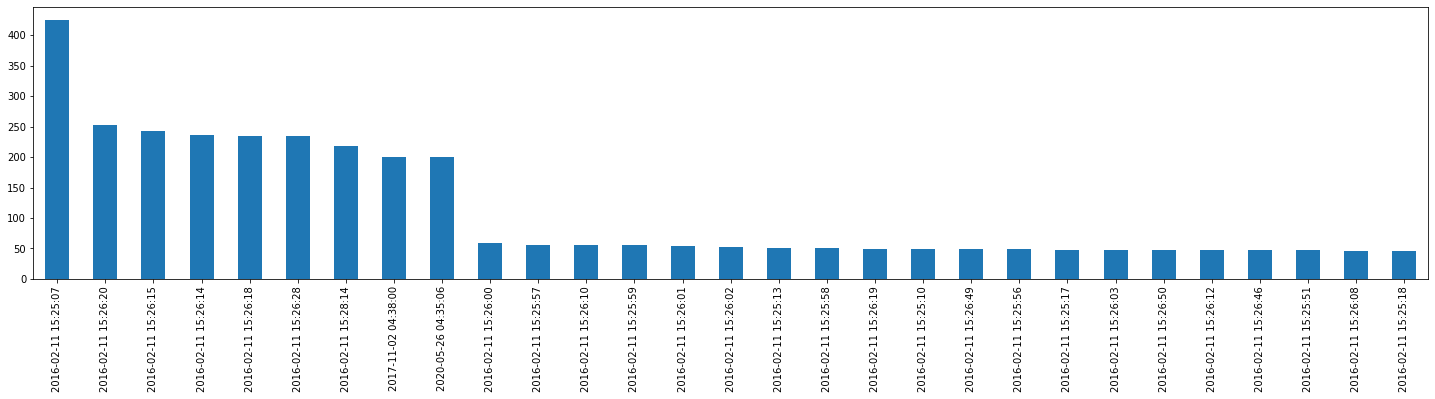

In [7]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = dftot.publicerad.value_counts()[1:30].plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

In [8]:
organCount = dftot.organ.value_counts() 
organCount

Försvarsdepartementet           1511
Utbildningsdepartementet        1354
Socialdepartementet             1068
Civildepartementet               714
Finansdepartementet              654
                                ... 
Justitiedepartementet Ju Å         1
Kommunikationsdepartewmentet       1
Finansdepartementet  BB            1
Civildepartementet KONS            1
Finansdepartementet BA TOT         1
Name: organ, Length: 211, dtype: int64

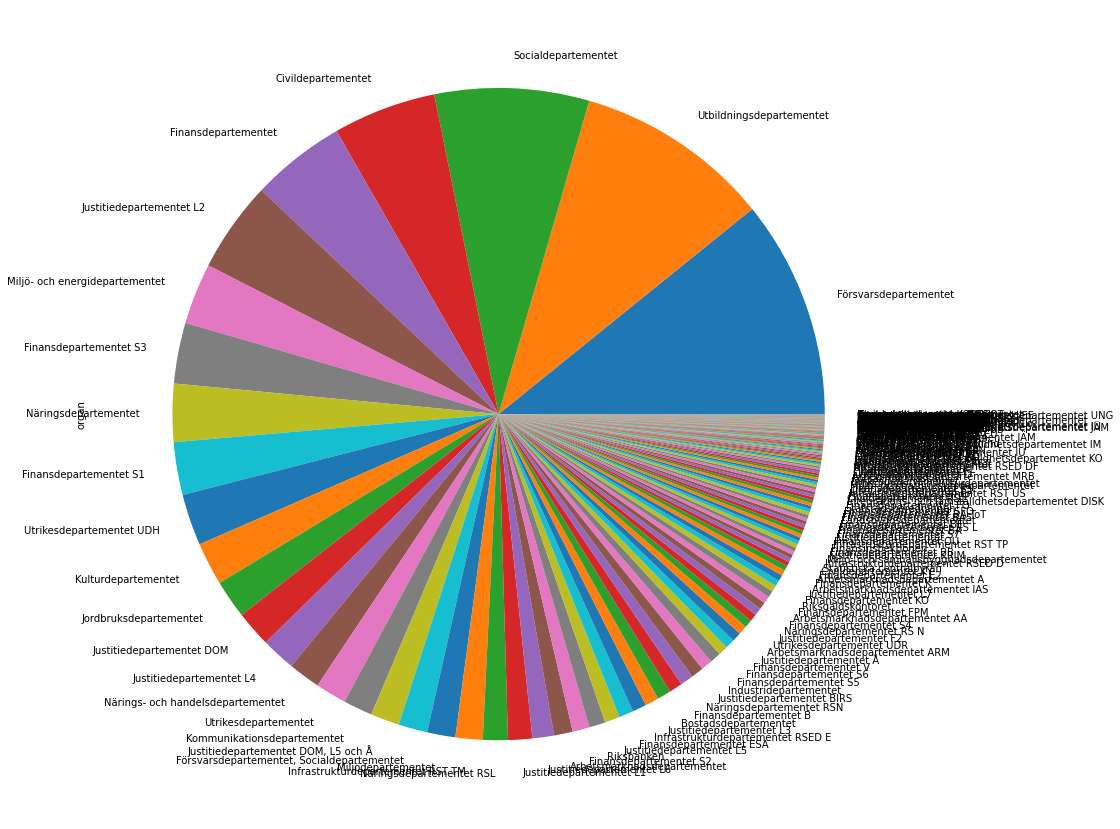

In [9]:
dftot.organ.value_counts().plot.pie(y='counts', figsize=(15, 15)) 
plt.show()

In [10]:
dftot.organ.value_counts()[1:50]

Utbildningsdepartementet                      1354
Socialdepartementet                           1068
Civildepartementet                             714
Finansdepartementet                            654
Justitiedepartementet L2                       629
Miljö- och energidepartementet                 422
Finansdepartementet S3                         421
Näringsdepartementet                           401
Finansdepartementet S1                         365
Utrikesdepartementet UDH                       356
Kulturdepartementet                            297
Jordbruksdepartementet                         265
Justitiedepartementet DOM                      249
Justitiedepartementet L4                       237
Närings- och handelsdepartementet              222
Utrikesdepartementet                           215
Kommunikationsdepartementet                    202
Justitiedepartementet DOM, L5 och Å            200
Försvarsdepartementet, Socialdepartementet     200
Miljödepartementet             

In [11]:
dftot.organ.value_counts()[50:100]

Justitiedepartementet L7                             41
Arbetsmarknadsdepartementet IAS                      38
Finansdepartementet K                                36
Arbetsmarknadsdepartementet A                        29
Finansdepartementet E2                               28
Civildepartementet KY                                27
Statistiska centralbyrån                             27
Infrastrukturdepartementet RSED D                    26
Miljö- och samhällsbyggnadsdepartementet             26
Justitiedepartementet KRIM                           25
Finansdepartementet BB                               25
Finansinspektionen                                   25
Infrastrukturdepartementet RST TP                    24
Finansdepartementet OU                               23
Justitiedepartementet                                23
Finansdepartementet S7                               23
Finansdepartementet BA                               22
Näringsdepartementet RS L                       

In [12]:
dftot.organ.value_counts()[100:150]

Civildepartementet FOK                              7
Arbetsmarknadsdepartementet IU                      7
Finansdepartementet UR                              7
Finansdepartementet SPN                             7
Justitiedepartementet F3                            7
Civildepartementet MA                               7
Riksförsäkringsverket                               6
Justitiedepartementet PP                            6
Civildepartementet KOM                              6
Integrations- och jämställdhetsdepartementet IM     6
Statens bostadskreditnämnd                          6
Civildepartementet ST                               5
Civildepartementet RS                               5
Finansdepartementet BF                              5
Civildepartementet UNG                              5
Justitiedepartementet F                             5
riksg                                               4
Finansdepartementet BA4                             4
Justitiedepartementet PÅ    

In [13]:
dftot.domain.value_counts()

rdwebb    13980
Name: domain, dtype: int64

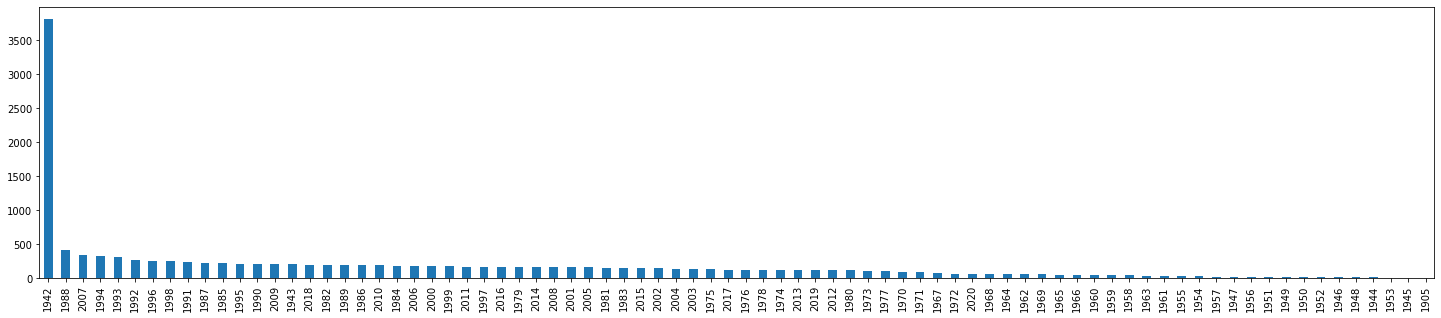

In [14]:
dftot.rm.value_counts() 
plotRM = dftot.rm.value_counts().plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

In [15]:
dftot['datum'] =pd.to_datetime(dftot.datum)  
dftot['publicerad'] =pd.to_datetime(dftot.publicerad)  
dftot['systemdatum'] =pd.to_datetime(dftot.systemdatum, format='%Y-%m-%d')
# 2016-02-11 15:26:06

In [16]:
dftot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13980 entries, 0 to 19
Data columns (total 59 columns):
traff                13980 non-null object
domain               13980 non-null object
database             13980 non-null object
datum                13980 non-null datetime64[ns]
id                   13980 non-null object
rdrest               0 non-null object
slutdatum            0 non-null object
rddata               0 non-null object
plats                0 non-null object
klockslag            0 non-null object
publicerad           13980 non-null datetime64[ns]
systemdatum          13980 non-null datetime64[ns]
undertitel           6536 non-null object
kalla                5 non-null object
kall_id              5 non-null object
dok_id               13980 non-null object
dokumentformat       0 non-null object
dokument_url_text    13980 non-null object
dokument_url_html    13980 non-null object
inlamnad             0 non-null object
motionstid           0 non-null object
tilldela

In [17]:
dftot = dftot.sort_values('datum') 
dftot.head()

,traff,domain,database,datum,id,rdrest,slutdatum,rddata,plats,klockslag,publicerad,systemdatum,undertitel,kalla,kall_id,dok_id,dokumentformat,dokument_url_text,dokument_url_html,inlamnad,motionstid,tilldelat,lang,url,relurl,titel,rm,organ,relaterat_id,doktyp,typ,subtyp,beteckning,tempbeteckning,nummer,status,score,sokdata,summary,notisrubrik,notis,dokintressent,filbilaga,avdelning,struktur,audio,video,debattgrupp,debattdag,beslutsdag,beredningsdag,justeringsdag,beslutad,debattsekunder,ardometyp,reservationer,debatt,debattnamn,dokumentnamn
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling


In [18]:
dftot.tail()

,traff,domain,database,datum,id,rdrest,slutdatum,rddata,plats,klockslag,publicerad,systemdatum,undertitel,kalla,kall_id,dok_id,dokumentformat,dokument_url_text,dokument_url_html,inlamnad,motionstid,tilldelat,lang,url,relurl,titel,rm,organ,relaterat_id,doktyp,typ,subtyp,beteckning,tempbeteckning,nummer,status,score,sokdata,summary,notisrubrik,notis,dokintressent,filbilaga,avdelning,struktur,audio,video,debattgrupp,debattdag,beslutsdag,beredningsdag,justeringsdag,beslutad,debattsekunder,ardometyp,reservationer,debatt,debattnamn,dokumentnamn
4,5,rdwebb,dokument,2020-06-25,sfs-2020-582,None,None,None,None,None,2020-06-27 04:43:44,2020-06-27 04:43:44,None,None,None,sfs-2020-582,None,//data.riksdagen.se/dokument/sfs-2020-582.text,//data.riksdagen.se/dokument/sfs-2020-582.html,None,None,None,None,None,None,Förordning (2020:582) om viss sjukpenning i fö...,2020,Socialdepartementet,None,sfs,sfs,sfst,2020:582,None,582,None,220,{'titel': 'Förordning (2020:582) om viss sjukp...,None,Förordning (2020:582) om viss sjukpenning i fö...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
3,4,rdwebb,dokument,2020-06-25,sfs-2020-592,None,None,None,None,None,2020-06-27 04:43:45,2020-06-27 04:43:45,None,None,None,sfs-2020-592,None,//data.riksdagen.se/dokument/sfs-2020-592.text,//data.riksdagen.se/dokument/sfs-2020-592.html,None,None,None,None,None,None,Förordning (2020:592) om extra statsbidrag för...,2020,Utbildningsdepartementet,None,sfs,sfs,sfst,2020:592,None,592,None,220,{'titel': 'Förordning (2020:592) om extra stat...,None,Förordning (2020:592) om extra statsbidrag för...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
2,3,rdwebb,dokument,2020-06-25,sfs-2020-614,None,None,None,None,None,2020-06-30 04:37:08,2020-06-30 04:37:08,None,None,None,sfs-2020-614,None,//data.riksdagen.se/dokument/sfs-2020-614.text,//data.riksdagen.se/dokument/sfs-2020-614.html,None,None,None,None,None,None,Avfallsförordning (2020:614),2020,Miljödepartementet,None,sfs,sfs,sfst,2020:614,None,614,None,220,"{'titel': 'Avfallsförordning (2020:614)', 'und...",None,Avfallsförordning (2020:614),None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
1,2,rdwebb,dokument,2020-06-25,sfs-2020-616,None,None,None,None,None,2020-06-30 04:37:09,2020-06-30 04:37:09,None,None,None,sfs-2020-616,None,//data.riksdagen.se/dokument/sfs-2020-616.text,//data.riksdagen.se/dokument/sfs-2020-616.html,None,None,None,None,None,None,Lag (2020:616) om verkställighet av ungdomsöve...,2020,Justitiedepartementet L5,None,sfs,sfs,sfst,2020:616,None,616,None,350,{'titel': 'Lag (2020:616) om verkställighet av...,None,Lag (2020:616) om verkställighet av ungdomsöve...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
0,1,rdwebb,dokument,2020-07-02,sfs-2020-720,None,None,None,None,None,2020-07-04 04:35:10,2020-07-04 04:35:10,None,None,None,sfs-2020-720,None,//data.riksdagen.se/dokument/sfs-2020-720.text,//data.riksdagen.se/dokument/sfs-2020-720.html,None,None,None,None,None,None,Förordning (2020:720) om stöd vid tillfälligt ...,2020,Näringsdepartementet,None,sfs,sfs,sfst,2020:720,None,720,None,220,{'titel': 'Förordning (2020:720) om stöd vid t...,None,Förordning (2020:720) om stöd vid tillfälligt ...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling


In [19]:
dftot.subtyp.value_counts()

sfst          13975
regl-riksg        4
regl-riksb        1
Name: subtyp, dtype: int64

Gissning 
* regl-riksg verkar vara Reglemente för Riksgäldskontoret 
* regl-riksb är nog Riksbanken

In [20]:
dftot.debattnamn.value_counts()

Svensk författningssamling    13980
Name: debattnamn, dtype: int64

In [21]:
ftot = dftot.sort_values(by='id', ascending=False) 

In [22]:
dftot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13980 entries, 19 to 0
Data columns (total 59 columns):
traff                13980 non-null object
domain               13980 non-null object
database             13980 non-null object
datum                13980 non-null datetime64[ns]
id                   13980 non-null object
rdrest               0 non-null object
slutdatum            0 non-null object
rddata               0 non-null object
plats                0 non-null object
klockslag            0 non-null object
publicerad           13980 non-null datetime64[ns]
systemdatum          13980 non-null datetime64[ns]
undertitel           6536 non-null object
kalla                5 non-null object
kall_id              5 non-null object
dok_id               13980 non-null object
dokumentformat       0 non-null object
dokument_url_text    13980 non-null object
dokument_url_html    13980 non-null object
inlamnad             0 non-null object
motionstid           0 non-null object
tilldela

In [23]:
dftot.head(1000) 

,traff,domain,database,datum,id,rdrest,slutdatum,rddata,plats,klockslag,publicerad,systemdatum,undertitel,kalla,kall_id,dok_id,dokumentformat,dokument_url_text,dokument_url_html,inlamnad,motionstid,tilldelat,lang,url,relurl,titel,rm,organ,relaterat_id,doktyp,typ,subtyp,beteckning,tempbeteckning,nummer,status,score,sokdata,summary,notisrubrik,notis,dokintressent,filbilaga,avdelning,struktur,audio,video,debattgrupp,debattdag,beslutsdag,beredningsdag,justeringsdag,beslutad,debattsekunder,ardometyp,reservationer,debatt,debattnamn,dokumentnamn
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
19,10000,rdwebb,dokument,1942-05-29,sfs-1942-263,None,None,None,None,None,2016-02-11 15:25:07,2016-02-11 15:25:07,None,None,None,sfs-1942-263,None,//data.riksdagen.se/dokument/sfs-1942-263.text,//data.riksdagen.se/dokument/sfs-1942-263.html,None,None,None,None,None,None,Lag (1942:263) om preskription av rätt till me...,1942,Justitiedepartementet L2,None,sfs,sfs,sfst,1942:263,None,263,None,80,{'titel': 'Lag (1942:263) om preskription av r...,None,Lag (1942:263) om preskription av rätt till me...,None,None,None,dokument,None,None,None,None,None,None,None,None,None,None,None,None,None,Svensk författningssamling,Svensk författningssamling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [24]:
print("End run: ", datetime.now())

End run:  2020-09-12 14:25:30.624289
